(4, 5)
dict_keys(['full_circ', 'fc_shots', 'sv', 'qasm', 'qasm+noise', 'hw', 'mitigated_hw', 'searcher_time', 'clusters', 'complete_path_map', 'classical_time', 'quantum_time', 'all_cluster_prob', 'mitigated_all_cluster_prob', 'reconstructor_time', 'cutting', 'mitigated_reconstructor_time', 'mitigated_cutting'])


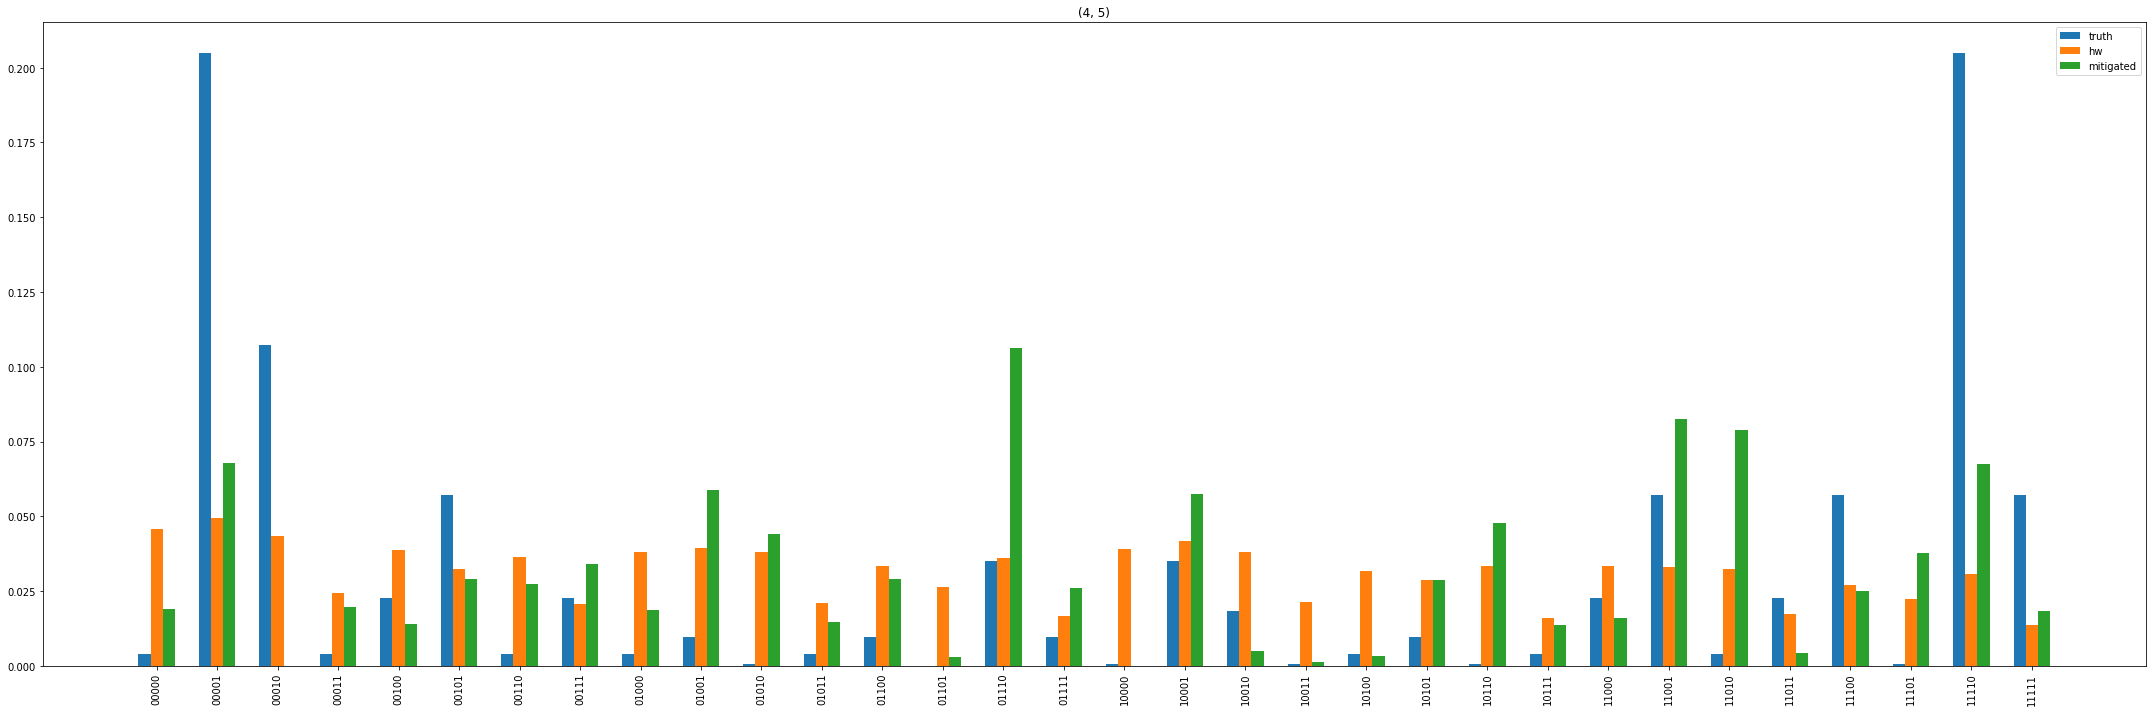

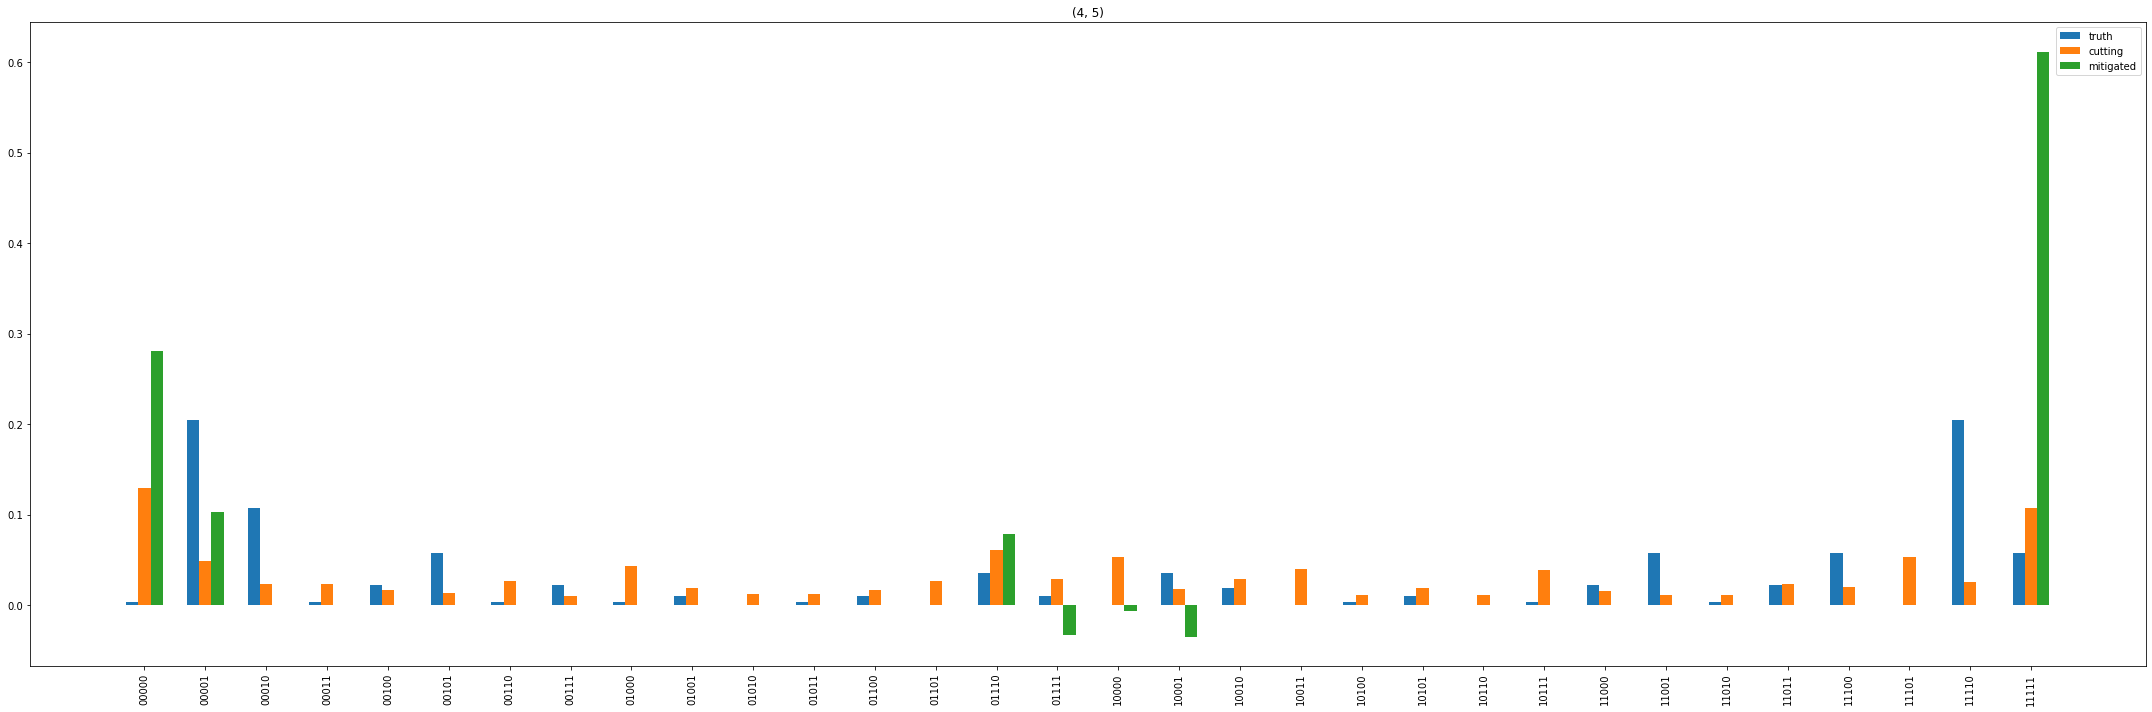

In [1]:
import matplotlib.pyplot as plt
from utils.helper_fun import get_filename, read_file
from utils.conversions import list_to_dict, dict_to_array
import numpy as np

def plot_bar(data,legends,title):
    nqubits = len(list(data[0].keys())[0])
    labels = [bin(state)[2:].zfill(nqubits) for state in range(2**nqubits)]
    x = np.arange(len(labels))
    width = 1/(len(data)+2)

    fig, ax = plt.subplots(figsize=(30,10))
    counter = -int(len(data)/2)
    for datum, legend in zip(data,legends):
        datum = dict_to_array(distribution_dict=datum,force_prob=True)
        rects = ax.bar(x + counter*width, datum, width, label=legend)
        counter += 1
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation='vertical')
    ax.legend()
    fig.tight_layout()

    fig.savefig('%s.png'%title)
    return

dirname, saturated_filename = get_filename(experiment_name='hardware',circuit_type='supremacy',device_name='ibmq_boeblingen',field='plotter_input',evaluation_method='hardware',shots_mode='saturated')
plotter_input = read_file(dirname+saturated_filename)
for case in plotter_input:
    print(case)
    print(plotter_input[case].keys())
    truth = list_to_dict(l=plotter_input[case]['sv'])
    qasm = list_to_dict(l=plotter_input[case]['qasm'])
    hw = list_to_dict(l=plotter_input[case]['hw'])
    mitigated_hw = list_to_dict(l=plotter_input[case]['mitigated_hw'])
    cutting = list_to_dict(l=plotter_input[case]['cutting'])
    mitigated_cutting = list_to_dict(l=plotter_input[case]['mitigated_cutting'])
    plot_bar(data=[truth,hw,mitigated_hw],legends=['truth','hw','mitigated'],title='{}'.format(case))
    plot_bar(data=[truth,cutting,mitigated_cutting],legends=['truth','cutting','mitigated'],title='{}'.format(case))
    break